# <font color=green> ML: Dados de alta dimensionalidade
---

In [1]:
import pandas as pd

In [2]:
resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
from sklearn.model_selection import train_test_split
from numpy import random
 
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, 
                                                        diagnostico)

In [4]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [5]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [11]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100) # n_estimators = qts arvores de decisão vão ser construídas no modelo
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x,teste_y))


0.9239766081871345


In [12]:
#Tratando valores vazios
valores_exames.isnull()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
valores_exames.isnull().sum()

exame_1       0
exame_2       0
exame_3       0
exame_4       0
exame_5       0
exame_6       0
exame_7       0
exame_8       0
exame_9       0
exame_10      0
exame_11      0
exame_12      0
exame_13      0
exame_14      0
exame_15      0
exame_16      0
exame_17      0
exame_18      0
exame_19      0
exame_20      0
exame_21      0
exame_22      0
exame_23      0
exame_24      0
exame_25      0
exame_26      0
exame_27      0
exame_28      0
exame_29      0
exame_30      0
exame_31      0
exame_32      0
exame_33    419
dtype: int64

In [14]:
#Vimos que apenas a coluna "exame_33" está co valores vazio (e muitos). Logo, temos que tratar isso!

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random
 
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

valores_exames_v1 = valores_exames.drop(columns='exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                       test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100) # n_estimators = qts arvored de decisão vão ser construídas no modelo
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))

0.9239766081871345


In [16]:
# COMPARANDO COM O DUMMY CLASSIFIER
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print((classificador_bobo.score(teste_x, teste_y)*100))

66.66666666666666


* A ideia de um workflow de machine learning.

* O que são as dimensões de um dado e dados de alta dimensionalidade.

* Identificar e tratar valores faltantes em uma base de dados.

------------------------------
---------------------------
----------------------------

* Como resgatar os valores para cada exame, considerado cada diagnosticos ?
    * M, exame_1 == valores
    * B, exame_1 == valores

In [17]:
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [18]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [19]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores") # Melt reorganiza meus dados no formato abaixo
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


<AxesSubplot:xlabel='exames', ylabel='valores'>

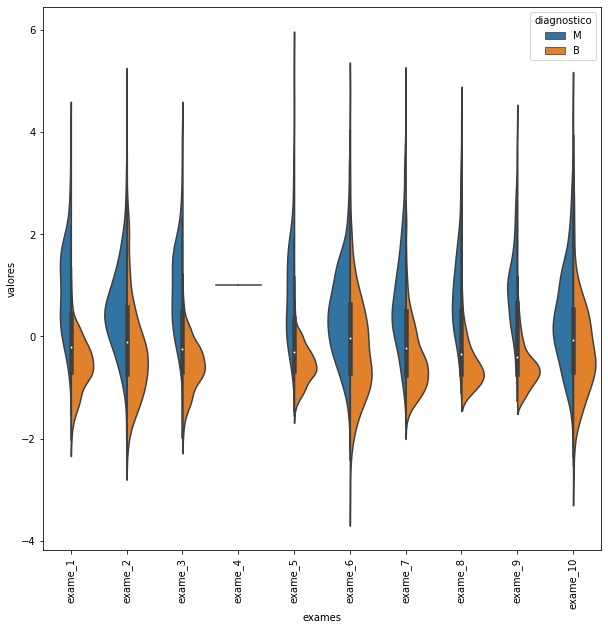

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Escalando os valores desejados
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys()) #Transformando em um df

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores") # Melt reorganiza meus dados no formato abaixo


plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot, split=True) #gráfico no formato de violino

In [21]:
#PERCEBE-SE QUE OS VALORES DO EXAME_4 SÃO CONSTANTES. COM ISSO, RETIRAR ESSA FEATURE NÃO VAI IMPACTAR NOS NOSSOS RESULTADOS
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [22]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores") # Melt reorganiza meus dados no formato abaixo


    plt.figure(figsize = (10,10))
    plt.xticks(rotation = 90)

    sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot, split=True) #gráfico no formato de violino

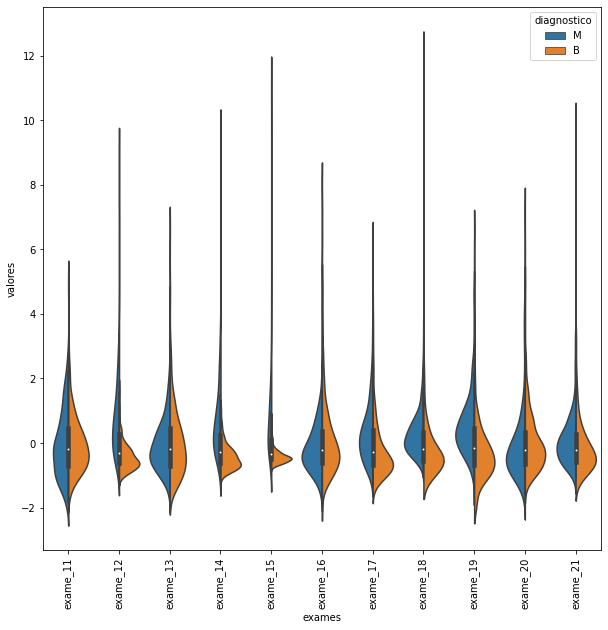

In [23]:
grafico_violino(valores_exames_v2, 10, 21)

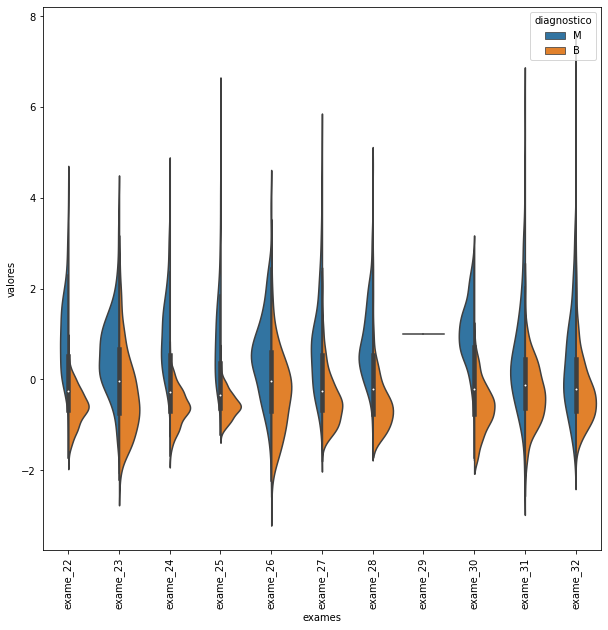

In [24]:
grafico_violino(valores_exames_v2, 21, 32)

In [25]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29","exame_4"])

In [26]:
def classificar(valores):
    SEED = 123
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                            diagnostico,
                                                           test_size = 0.3)


    classificador = RandomForestClassifier(n_estimators = 100) # n_estimators = qts arvored de decisão vão ser construídas no modelo
    classificador.fit(treino_x, treino_y)
    print(classificador.score(teste_x, teste_y))

In [27]:
classificar(valores_exames_v3)

0.9824561403508771


* Como construir e interpretar o violin plot.
* Como identificar atributos com valores constantes.
* Como tratar atributos com valores constantes.

------------------------------------------------
------------------------------------------------
------------------------------------------------

In [28]:
# Agora precisamos calcular a correlação a partir do nosso DF

<AxesSubplot:>

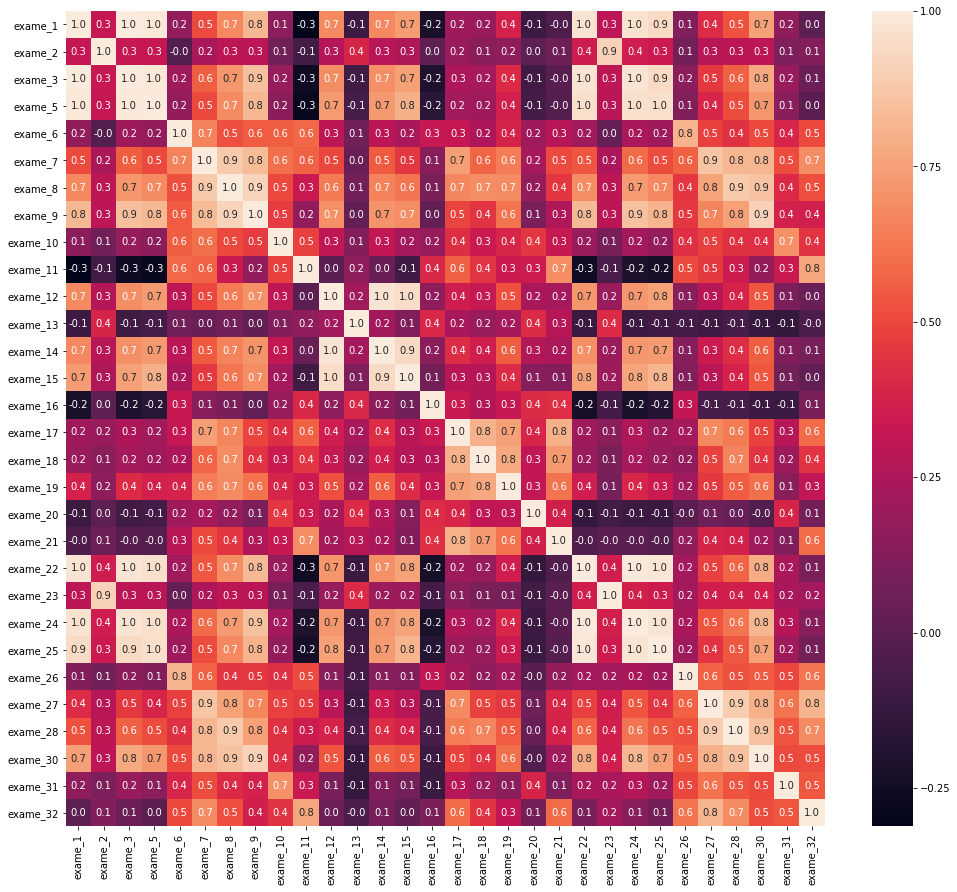

In [29]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt=".1f")

In [30]:
# Plotando apenas as que tem correlaca0 > 0.99
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum() #Para resgatar qual coluna temos correlações maiores que 0.99
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [32]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

* RESGATANDOS TODAS OS EXAMES QUE TEM UM ALTO GRAU DE CORRELAÇÃO E EXCLUÍMOS (um exame dentre o que ele está mais corr) PARA MELHOR CLASSIFICAR COM NOSSOS MODELOS (ASSIM COMO FOI FEITO COM OS QUE TEM VALORES CONSTANTES)

In [33]:
valores_exame_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exame_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
valores_exame_v5 = valores_exames_v3.drop(columns=["exame_3","exame_24"])

In [35]:
classificar(valores_exame_v5)

0.9824561403508771


* O que são dados correlacionados.
* Como construir e interpretar uma matriz de correlação.
* Como analisar e tratar os dados correlacionados.
----------------------------------------------------------
-------------------------------------------------------------
------------------------------------------------------------


In [36]:
# AGORA QUE JÁ SEPARAMOS AS FEATURES QUE ESTÃO COM UMA ALTA CORRELAÇÃO, HÁ ALGUMA FORMA NA QUAL PODEMOS SELECIONAR AS K MELHORES FEATURES ?
# SELECTKBEST RECEBE UMA FUNÇÃO QUE VAI GERAR UM SCORE PARA CADA FEATURE E  UM K (NMR DE FEATURES A SEREM ESCOLHIDAS)

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # FUNCAO QUE VAMOS PASSAR AO SelectKBest, QUE GERA ESSA PONTUAÇÃO PARA CADA FEATURE

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [38]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v5, 
                                                        diagnostico,
                                                        test_size = 0.3)
selecionar_kmelhores.fit(treino_x,treino_y)

ValueError: Input X must be non-negative.

In [39]:
# pegando os valores dos exams antes de serem normalizados
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4","exame_29", "exame_3", "exame_24"])

In [40]:
valores_exames_v6

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)
selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [42]:
#Logo, descobrimos que temos as 5 melhores features resgatadas pelo 
treino_kbest.shape

(398, 5)

In [43]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print(classificador.score(teste_kbest,teste_y)*100)

92.39766081871345


In [44]:
# Criando matriz de confusão

In [45]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

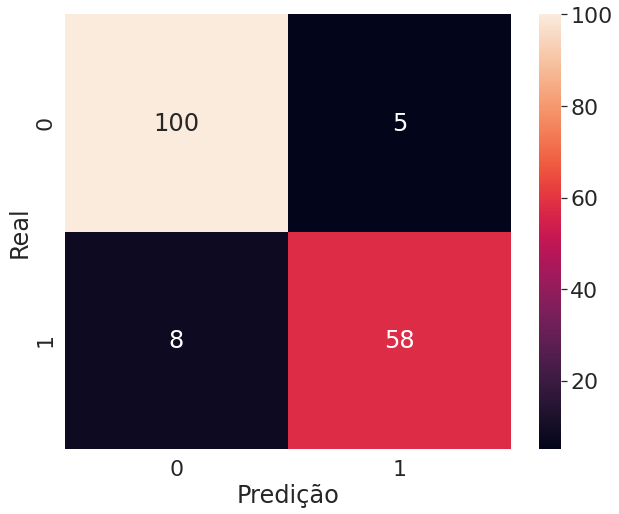

In [46]:
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

* RFE - Recursive Feature Elimination, algo como "Eliminação de Feature por Recursão"
    * Semelhante ao selectKBest(), mas eliminando por recursão cada feature uma por uma 

Resultado da classificação 90.06%


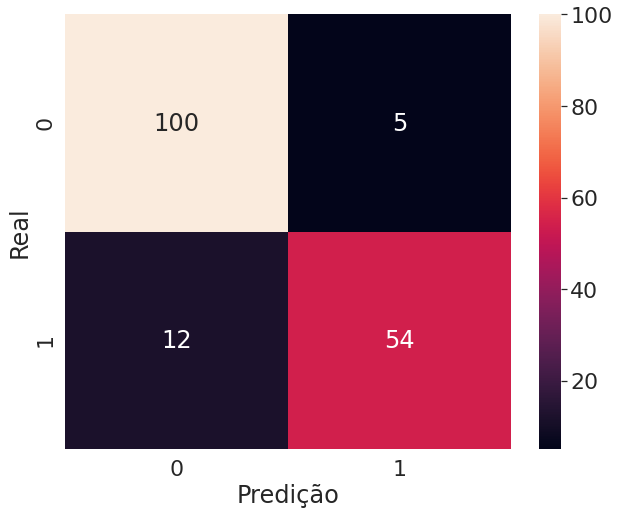

In [47]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1) 
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

* O que são os métodos automáticos de seleção de features.
* O que é e como implementar o Selectkbest.
* Como avaliar resultdos utilizando a matriz de confusão.
* O que é e como implementar o RFE.

-------------------------
---------------------------
----------------------------------

In [48]:
# Resolvemos problemas os quais nos retornavam as k melhores features.
# Agora vamos realizar o caso que nos retorna conjunto de features que nos gera o melhor resultado => RFE CV => Aplica o RFE em cada bloco que foi separado do mu BD

Resultado da classificação 92.98%


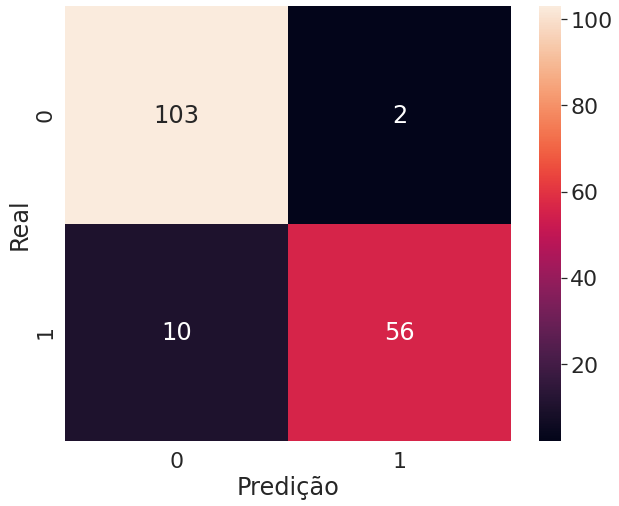

In [49]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv=5, step = 1, scoring = "accuracy") #scoring = funcao de avaliacao (metrica utilizada)
selecionador_rfecv.fit(treino_x, treino_y)

treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

In [50]:
#Qts features ele determinou como as melhores:
selecionador_rfecv.n_features_

26

In [51]:
selecionador_rfecv.support_ #Features selecionadas
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [52]:
# Score para todas as features
print(selecionador_rfecv.grid_scores_)
print(len(selecionador_rfecv.grid_scores_))

[0.86936709 0.93205696 0.94727848 0.94474684 0.95231013 0.94974684
 0.95227848 0.96234177 0.94727848 0.95224684 0.95981013 0.96234177
 0.96484177 0.96231013 0.96234177 0.96231013 0.96734177 0.95731013
 0.96734177 0.95984177 0.95734177 0.94981013 0.96484177 0.95481013
 0.95231013 0.96981013 0.96231013 0.95984177]
28


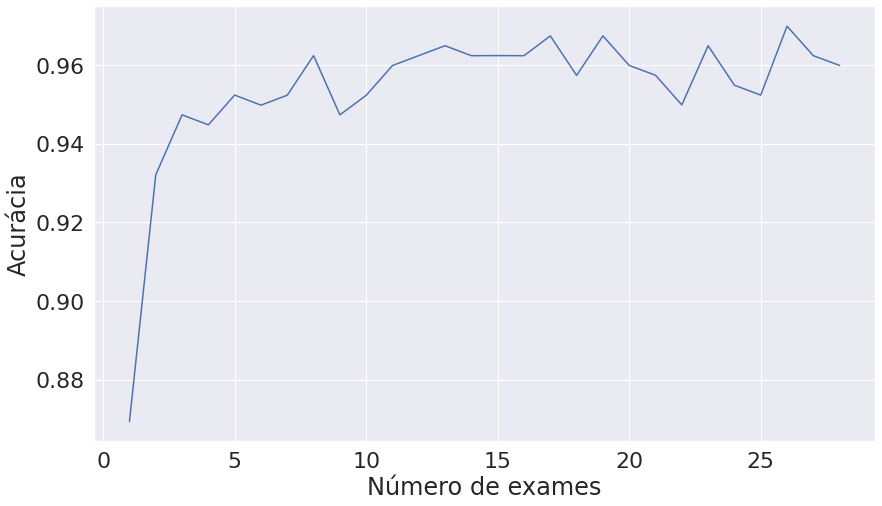

In [53]:
#Plotando o gráfico que diz o porque dessas serem as features selecionadas
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)
plt.show()

* VISUALIZANDO DADOS NO PLANO:
    * Devo mudar meu RFE para 2 , a fim de gerar o gráfico com 2 planos

Resultado da classificação 87.13%


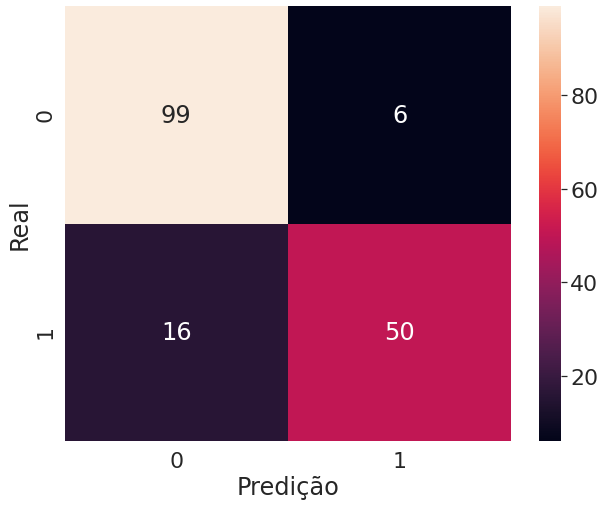

In [54]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1) 
selecionador_rfe.fit(treino_x, treino_y)

treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

In [55]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [56]:
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

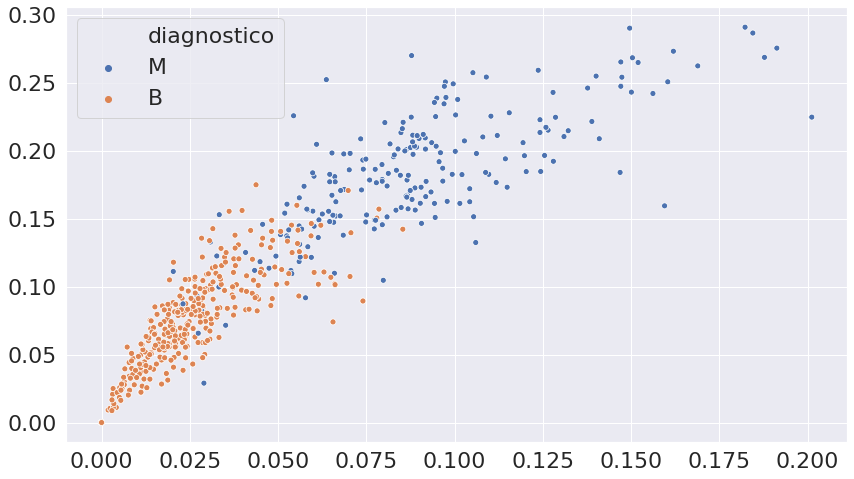

In [57]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

* Obs.: Como reduzimos a 2 o nmr de features para gerar essa visualização, acabamos perdendo mt informação. Logo, selecionar apenas 2 features não é o mais adequado. De alguma maneira, preciso preservar as principais características entre os tipos M e B
    * Uma das tecnicas que podemos usar para manter o máximo de informação possível em uma dimensionalidade reduzida é o PCA ou TSNE
        * PCA: Pega nossos dados, faz uma transformação matemática neles, na qual as primeiras dimensões serão as variáveis que vão manter o maior nmr possível de informações
        * TSNE: PCA que tenta manter as distâncias entre os pontos 

<AxesSubplot:>

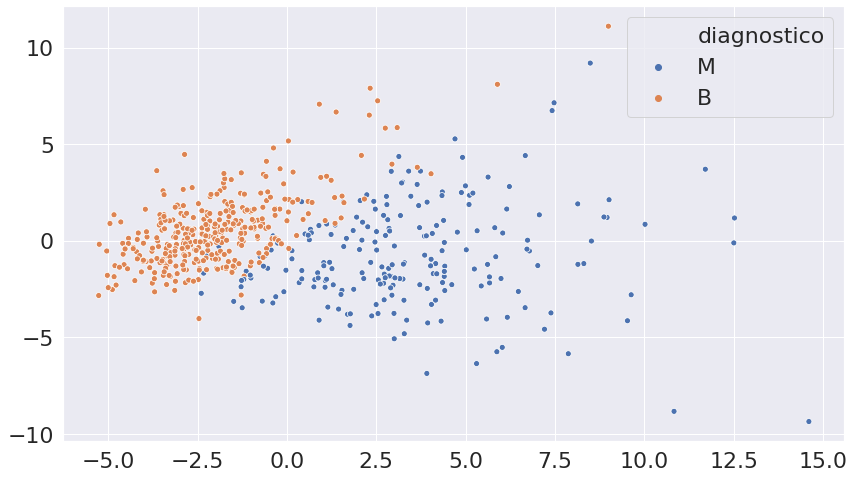

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # n_components = NMR DE VARIÁVEIS QUE DESEJO COMO RTORNO
valores_exames_v8 = pca.fit_transform(valores_exame_v5) # valores_exames_v5 = nosso ultimo DF sem a transformação
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0] , y = valores_exames_v8[:,1], hue = diagnostico)

<AxesSubplot:>

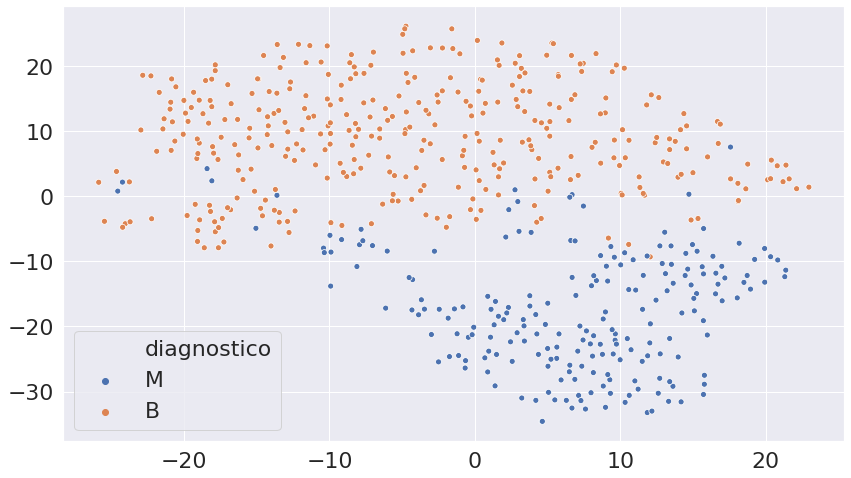

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exame_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0] , y = valores_exames_v9[:,1], hue = diagnostico)

* Como estimar a melhor combinação de features com o REFCV.
* Como visualizar os dados de alta dimensionalidade no plano.
* Como melhorar a visualização utilizando PCA e T-SNE.
****************************
****************************
****************************